0) Mount drive, import libraries.

In [ ]:
#First, you need to mount your Google Drive, so that the files on it can be accessed by the code in this Colab Notebook
from google.colab import drive
drive.mount('/content/drive')

#Import Pandas
from __future__ import print_function

import pandas as pd        #import pandas (a)
import numpy as np         #import numpy (b)
import scipy.stats         #import scipy (b)
import pylab               #import pylab (b)

import ssl                 #import ssl (c)
ssl._create_default_https_context = ssl._create_unverified_context  #tweak settings to be able to access unverifed content/data (c)

Mounted at /content/drive


Q.1) The end product for this question will be a csv file (`md_pop_dens.csv`) that lists the 24 Maryland counties with
* their land areas in `square meters`,
* their populations in `people`, and
* their population densities in `people per square kilometer`.<br/>
The counties will be listed in the csv file from the one with the highest population density to the one with the lowest population density.

The land area and population figures are given in the source data file ([`us_counties_2010`](https://terpconnect.umd.edu/~vdiker/INFM603/us_counties_2010.csv)) in the `AREALAND` and `P0010001` series, respectively. The state for each county is indicated in the `STUSAB` series using state abbreviations; the `STUSAB` value for Maryland is `MD`. You will need to calculate the population density figures based on `P0010001` and `AREALAND` values. (Note that the `AREALAND` values are in square meters; so, you will need to divide them by 1000000 (one million) to find the square kilometer equivalents, and use those values in calculating the `people per sq. km.` values.

Here is a possible step-by-step approach you can use to answer this question:
* Read the source data file `us_counties_2010.csv`, and assign its contents to a dataframe.
* Filter data rows to capture only the data for Maryland counties, and assign those rows to a new dataframe.
* Capture only the county name (`NAME`), land area (`AREALAND`), and population (`P0010001`) series (columns), and assign those columns to a new dataframe.
* Calculate the population density values (`[Population / (Area / 1000000)]`) and add them as a new series (column) to the current dataframe.
* Sort the rows in the current dataframe by population density, descending (from the highest value to the lowest), and assign the resultant data to a new dataframe.
* Save the most current dataframe as a csv file. The resultant csv file should look like [this](https://terpconnect.umd.edu/~vdiker/INFM603/md_pop_dens_csv_in_txt_edt.jpg) when opened in a text editor, and like [this](https://terpconnect.umd.edu/~vdiker/INFM603/md_pop_dens_csv_in_spr_app.jpg) when opened in a spreadsheet application.

Link to source data file: https://terpconnect.umd.edu/~vdiker/INFM603/us_counties_2010.csv

In [ ]:
#Enter your code for Q1 here.

us_counties_stats_dataframe = pd.read_csv("https://terpconnect.umd.edu/~vdiker/INST126/us_counties_2010.csv")
#Read csv file, and assign file data to a dataframe

md_counties_stats_dataframe = us_counties_stats_dataframe[us_counties_stats_dataframe['STUSAB'] == 'MD']
#Create new dataframe with only counties in Maryland / Row-wise filtering

md_counties_stats_dataframe

#Create new dataframe with only county name, area, and population series / Column-wise filtering
md_dataframe = md_counties_stats_dataframe[["NAME","AREALAND", "P0010001"]]

#Add new calculated series with population density values
md_dataframe["POPULATION DENSITY"] = md_dataframe["P0010001"] / (md_dataframe["AREALAND"] / 1000000)


#Create new dataframe by sorting rows by population density, descending
sorted_md_dataframe = md_dataframe.sort_values(by = "POPULATION DENSITY", ascending  = False)

#Write dataframe to csv file
sorted_md_dataframe.to_csv("md_pop_dens.csv")

#assign the csv file data to a dataframe (d)


<ipython-input-3-c1977878c750>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  md_dataframe["POPULATION DENSITY"] = md_dataframe["P0010001"] / (md_dataframe["AREALAND"] / 1000000)


Q.2) The end product for this question will be a csv file (`md_pct_change.csv`) that lists the 24 Maryland counties with
* their populations in 2000,
* their populations in 2010, and
* the percent change in their populations from 2000 to 2010.<br/>
The counties will be listed in the csv file from the one with the highest percent population change to the one with the lowest percent population change.

The 2000 population figures for the counties are given in the first source data file ([`us_counties_2000`](https://terpconnect.umd.edu/~vdiker/INFM603/us_counties_2000.csv)) in the `p0010001` series; (note the lower case letter 'p' in the series name). The 2010 population figures for the counties are given in the second source data file ([`us_counties_2010`](https://terpconnect.umd.edu/~vdiker/INFM603/us_counties_2010.csv)) in the `P0010001` series; (note the upper case letter 'P' in the series name). The names of the counties are indicated in the `geo_name` series in `us_counties_2000.csv`, and in the `NAME` series in `us_counties_2010.csv`. You can calculate the percent population change values using the following formula:

`100 * (population in 2010 - population in 2000) / population in 2000`

Here is a possible step-by-step approach you can use to answer this question:
* Read the two source data files `us_counties_2000.csv` and `us_counties_2010.csv`, and assign their contents to two dataframes.
* Capture only the county name (`geo_name` and `us_counties_2000.csv`, and `NAME` in `us_counties_2010.csv`) and population (`p0010001` in`us_counties_2000.csv`, and `P0010001` in `us_counties_2010.csv`) series (columns), and assign those columns to two new dataframes.
* Calculate the percent population density values, (see formula above), and add them as a new series (column) to the current dataframe.
* Sort the rows in the current dataframe by percent population change, descending (from the highest value to the lowest), and assign the resultant data to a new dataframe.
* Save the most current dataframe as a csv file. The resultant csv file should look like [this](https://terpconnect.umd.edu/~vdiker/INFM603/md_pct_change_csv_in_txt_edt.jpg) when opened in a text editor, and like [this](https://terpconnect.umd.edu/~vdiker/INFM603/md_pct_change_csv_in_spr_app.jpg) when opened in a spreadsheet application.

Link to source data files:
* https://terpconnect.umd.edu/~vdiker/INFM603/us_counties_2000.csv
* https://terpconnect.umd.edu/~vdiker/INFM603/us_counties_2010.csv

In [ ]:
#Enter your code for Q2 here.

#Read first csv file, and assign file data to a dataframe
us_2000 = pd.read_csv("https://terpconnect.umd.edu/~vdiker/INFM603/us_counties_2000.csv")

#Read second csv file, and assign file data to a dataframe
us_2010 = pd.read_csv("https://terpconnect.umd.edu/~vdiker/INFM603/us_counties_2010.csv")

#Create new dataframe with only county name and population series / Column-wise filtering
md_2000 = us_2000[us_2000['state_us_abbreviation'] == 'MD']
truncated_md_2000 = md_2000[["geo_name", "p0010001"]]
truncated_md_2000['geo_name'] = truncated_md_2000['geo_name'].map(lambda x: x.replace(", Maryland", ""))

#Create new dataframe with only county name and population series / Column-wise filtering
md_2010 = us_2010[us_2010['STUSAB'] == 'MD']
truncated_md_2010 = md_2010[["NAME", "P0010001"]]

#Column-wise concatenate the two dataframes into a new, single dataframe
merged_md = truncated_md_2000.merge(truncated_md_2010, left_on = 'geo_name', right_on = 'NAME')

#Add new calculated series with percent population change values
merged_md["POPULATION CHANGE"] = 100 * (merged_md['P0010001'] - merged_md['p0010001']) / merged_md['p0010001']

#Create new dataframe by sorting rows by percent population change, descending
sorted_merge_md = merged_md.sort_values(by = 'POPULATION CHANGE', ascending = False)

#Write dataframe to csv file
sorted_merge_md.to_csv("md_pct_change.csv")


<ipython-input-4-72fb5605828b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  truncated_md_2000['geo_name'] = truncated_md_2000['geo_name'].map(lambda x: x.replace(", Maryland", ""))


Q.3) Plot a horizontal bar chart of the percent population change in Maryland counties between 2000-2010.

Here is a possible step-by-step approach you can use to answer this question:
* Re-index the final dataframe from Q.2 using the `'NAME'` series values.
* Set up the horizontal bar chart using the `'PCT_CHANGE'` series values.
* Set the x-axis and y-axis labels.
* Reverse the y-axis order to list the counties in descending order by percent population change.

The resultant horizontal bar chart should look like [this](https://terpconnect.umd.edu/~vdiker/INFM603/pct_change_barh_hbc.jpg).

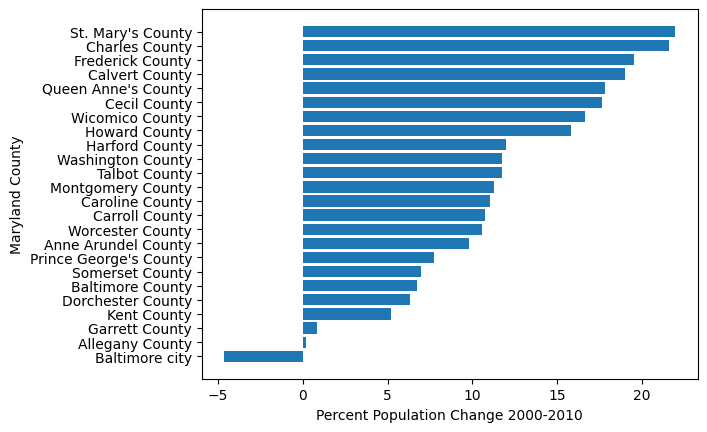

In [ ]:
#Enter your code for Q3 here.

#Re-index dataframe using 'NAME' series values
sorted_merge_md.index = sorted_merge_md['NAME']

#Set up horizontal bar chart using PCT_CHANGE series values
pylab.barh(y = sorted_merge_md['NAME'], width = sorted_merge_md['POPULATION CHANGE'])
#Set x-axis label
pylab.xlabel("Percent Population Change 2000-2010")

#Set y-axis label
pylab.ylabel("Maryland County")

#Reverse y-axis order to list counties in descending order by percent population change
pylab.gca().invert_yaxis()
pylab.show()


Q.4) Analyze the distribution of population density across Maryland counties in 2010 and identify any potential outliers.

* Calculate the population density for each county.
* Plot a boxplot to visualize the distribution of population density.
* Identify any counties that are outliers in terms of population density.



##########There are three outliers, which belongs to Baltimore city, Montgomery County and Prince George's County.

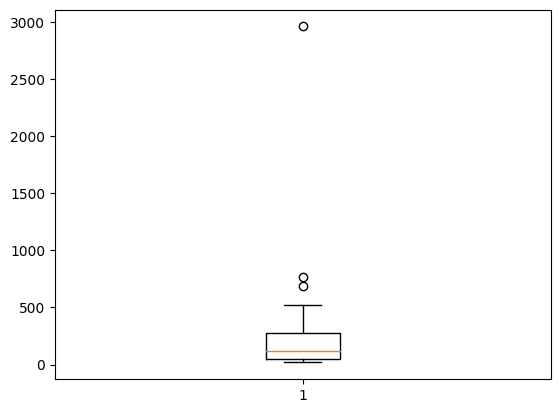

In [ ]:
#Enter your code for Q4 here

#Calculate the population density for each county.
county_name, population_density = sorted_md_dataframe['NAME'], sorted_md_dataframe['POPULATION DENSITY']

#Plot a boxplot to visualize the distribution of population density.
pylab.boxplot(population_density)
pylab.show()
#Identify any counties that are outliers in terms of population density.
percent_75, percent_25 = population_density.describe()["75%"], population_density.describe()["25%"]
iqr = percent_75 - percent_25
upper, lower = percent_75 + (iqr * 1.5), percent_25 - (iqr * 1.5)
#lower < 0, no need to check that situation
sorted_md_dataframe[sorted_md_dataframe['POPULATION DENSITY'] > upper]
##########There are three outliers, which belongs to Baltimore city, Montgomery County and Prince George's County.